### **1° Passo:** Importando as bibliotecas

In [7]:
import proplot as plot                      # Biblioteca para gerar figuras 
import pandas as pd                         # Biblioteca para ler arquivos tabulares
import cartopy.crs as ccrs                  # Biblioteca para trabalhar com projeções de mapas 
import cartopy.io.shapereader as shpreader  # Biblioteca para ler arquivos shapefiles 
from shapely.geometry import Point, Polygon, LineString
import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")

### **2° Passo:** Declarando funções

In [8]:
#----------------------------------------------------------------------------------- 
# Função que plota os Estados 
#----------------------------------------------------------------------------------- 
def evm_plot_states(shapefile):
    
    """
    Retorna a plotagem dos contornos de um shapefile na figura

    Parâmetros de entrada:
                shapefile (shp): shapefile da regiao 
                
    Parâmetros de saída:
                figura com o contorno da região baseado no shapefile fornecido
    """

    shapefile = list(shpreader.Reader(shapefile).geometries())
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.0)  

### **PARTE 1):** Leitura da planilha excell e organizando os dados

**Lendo arquivo: 2018**

In [9]:
# lendo o arquivo
df_2018 = pd.read_csv(f'input/Registros_2018.csv')

# deletando a primeira linha do dataframe
df_2018.drop([0], axis=0, inplace=True)

# elimina as últimas colunas
df_2018.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 14', 'Unnamed: 15'], axis=1, inplace=True)

# renomeia as colunas
df_2018.rename(columns={'VERIFI\nCADO?':'verificado',
                        'Q\n(1,\n2, 3)':'q',
                        'DATA':'data', 
                        'HORA\n(UTC)':'hormin',
                        'INCERTEZA\nNO HORÁRIO\n(+-MINUTOS)':'incerteza_hormin',
                        'lat':'lat', 
                        'lon':'lon',
                        'INCERTEZA\nNA LOCALI\nZAÇÃO (km)':'incerteza_loc',
                        'MUNICÍPIO':'cidade', 
                        'EST\nADO':'UF',
                        'TIPO \n(GRA,\nVEN,\nTOR)':'tipo', 
                        'INTEN-\nSIDADE\n(cm OU\n km/h)':'intensidade',
                        'DESCRIÇÃO':'descricao'},
                        inplace=True)

# exibe na tela
df_2018.head(2)

,verificado,q,data,hormin,incerteza_hormin,lat,lon,incerteza_loc,cidade,UF,tipo,intensidade,descricao
1,SIM,0.0,20180605.0,1745.0,0.0,-27.1243,-48.6036,0.0,Itapema,SC,GRA,3.0,Horário estimado por satélite. Tamanho estimad...
2,SIM,0.0,20180605.0,2030.0,0.0,-27.2800,-48.9200,0.0,Nova Trento,SC,GRA,1.0,Horário estimado por satélite. Relato via rede...


**Lendo arquivo: 2019**

In [11]:
# lendo o arquivo
df_2019 = pd.read_excel(f'input/Registros_2019.xlsx',
                        skiprows=15)

# elimina a última coluna
df_2019.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

# exibe na tela
df_2019

,",,,,,,,,FALTA VERIFICAR:,0,,,,,,,,,,,,,,,"
0,"SIM,1,20190101,1750,15,-23.0430,-47.3720,10,El..."
1,"SIM,1,20190101,1815,15,-22.7300,-43.3870,1,Bel..."
2,"SIM,1,20190101,2145,30,-30.2370,-54.9220,1,Ros..."
3,"SIM,1,20190102,1725,15,-22.9810,-47.0160,2,Val..."
4,"SIM,1,20190102,1825,10,-30.2650,-52.9410,15,Ca..."
...,...
6246,"SIM,2,20191231,1935,10,-29.0491,-50.1496,0.1,C..."
6247,"SIM,1,20191231,1935,10,-29.0486,-50.1442,1,Cam..."
6248,"SIM,1,20191231,2040,20,-23.0744,-52.3796,1,Par..."
6249,"SIM,1,20191231,2130,60,-6.5658,-39.1055,15,Ced..."


In [12]:
# divide as colunas na "vírgula"
dfx = df_2019[',,,,,,,,FALTA VERIFICAR:,0,,,,,,,,,,,,,,,'].str.split(",", expand = True)
dfx.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,SIM,1,20190101,1750,15,-23.0430,-47.3720,10,Elias Fausto,SP,...,None,None,None,None,None,None,None,None,None,None
1,SIM,1,20190101,1815,15,-22.7300,-43.3870,1,Belford Roxo,RJ,...,None,None,None,None,None,None,None,None,None,None
2,SIM,1,20190101,2145,30,-30.2370,-54.9220,1,RosÃ¡rio do Sul,RS,...,None,None,None,None,None,None,None,None,None,None
3,SIM,1,20190102,1725,15,-22.9810,-47.0160,2,Valinhos,SP,...,None,None,None,None,None,None,None,None,None,None
4,SIM,1,20190102,1825,10,-30.2650,-52.9410,15,Cachoeira do Sul,RS,...,None,None,None,None,None,None,None,None,None,None


In [13]:
# Cria o dataframe
dados = {'verificado': dfx.iloc[:,0], 
         'q': dfx.iloc[:,1],
         'data': dfx.iloc[:,2],
         'hormin': dfx.iloc[:,3],
         'incerteza_hormin': dfx.iloc[:,4],
         'lat': dfx.iloc[:,5],
         'lon': dfx.iloc[:,6],
         'incerteza_loc': dfx.iloc[:,7],
         'cidade': dfx.iloc[:,8],
         'UF': dfx.iloc[:,9],
         'tipo': dfx.iloc[:,10],
         'intensidade': dfx.iloc[:,11],
         'descricao': dfx.iloc[:,12]}

df_2019 = pd.DataFrame(dados)

# removendo linha com problema
df_2019.drop([6191,6192,6193], axis=0, inplace=True)

# exibe na tela
df_2019.head()

,verificado,q,data,hormin,incerteza_hormin,lat,lon,incerteza_loc,cidade,UF,tipo,intensidade,descricao
0,SIM,1,20190101,1750,15,-23.0430,-47.3720,10,Elias Fausto,SP,VEN,0.0,HorÃ¡rio estimado pelo radar de SÃ£o Roque. Qu...
1,SIM,1,20190101,1815,15,-22.7300,-43.3870,1,Belford Roxo,RJ,GRA,0.0,"""HorÃ¡rio estimado por satÃ©lite. Granizo no b..."
2,SIM,1,20190101,2145,30,-30.2370,-54.9220,1,RosÃ¡rio do Sul,RS,VEN,0.0,"""HorÃ¡rio estimado pelo radar de CanguÃ§u. Des..."
3,SIM,1,20190102,1725,15,-22.9810,-47.0160,2,Valinhos,SP,VEN,0.0,HorÃ¡rio estimado pelo radar de SÃ£o Roque. Qu...
4,SIM,1,20190102,1825,10,-30.2650,-52.9410,15,Cachoeira do Sul,RS,VEN,0.0,"""HorÃ¡rio estimado pelo radar de CanguÃ§u. Cas..."


**Lendo arquivo: 2020**

In [14]:
# lendo o arquivo
df_2020 = pd.read_csv(f'input/Registros_2020.csv')

# deletando a primeira linha do dataframe
df_2020.drop([0], axis=0, inplace=True)

# elimina a última coluna
df_2020.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 14', 'Unnamed: 15','Unnamed: 16'], axis=1, inplace=True)

# renomeia as colunas
df_2020.rename(columns={'VERIFI\nCADO?':'verificado',
                        'Q\n(1,\n2, 3)':'q',
                        'DATA':'data', 
                        'HORA\n(UTC)':'hormin',
                        'INCERTEZA\nNO HORÁRIO\n(+-MINUTOS)':'incerteza_hormin',
                        'lat':'lat', 
                        'lon':'lon',
                        'INCERTEZA\nNA LOCALI\nZAÇÃO (km)':'incerteza_loc',
                        'MUNICÍPIO':'cidade', 
                        'EST\nADO':'UF',
                        'TIPO \n(GRA,\nVEN,\nTOR)':'tipo', 
                        'INTEN-\nSIDADE\n(cm OU\n km/h)':'intensidade',
                        'DESCRIÇÃO':'descricao'},
                        inplace=True)

# exibe na tela
df_2020.head(2)

,verificado,q,data,hormin,incerteza_hormin,lat,lon,incerteza_loc,cidade,UF,tipo,intensidade,descricao
1,SIM,2.0,20200101.0,1230.0,30.0,-11.4458,-61.4341,0.1,Cacoal,RO,VEN,105.1,Horário estimado por satélite. Dados INMET.
2,SIM,1.0,20200101.0,1340.0,15.0,-28.2923,-52.7953,5.0,Carazinho,RS,VEN,0.0,Horário estimado pelo radar de Santiago. Árvor...


**Lendo arquivo: 2021**

In [15]:
# lendo o arquivo
df_2021 = pd.read_csv(f'input/Registros_2021.csv')

# deletando a primeira linha do dataframe
df_2021.drop([0], axis=0, inplace=True)

# elimina a última coluna
df_2021.drop(['Unnamed: 13'], axis=1, inplace=True)

# renomeia as colunas
df_2021.rename(columns={'VERIFI\nCADO?':'verificado',
                   'Q:\n1\n2\nou\n3':'q',
                   'DATA':'data', 
                   'HORA\n(UTC)':'hormin',
                   'INCER-\nTEZA NO\nHORÁRIO\nMINUTOS':'incerteza_hormin',
                   'lat':'lat', 
                   'lon':'lon',
                   'INCER-\nTEZA NA\nLOCALI-\nZAÇÃO \n(km)':'incerteza_loc',
                   'MUNICÍPIO':'cidade', 
                   'ES\nTA\nDO':'UF',
                   'TIPO: \nGRA\nVEN\nOU\nTOR':'tipo', 
                   'INTEN-\nSIDADE\n(cm OU\n km/h)':'intensidade',
                   'DESCRIÇÃO':'descricao'},
                   inplace=True)

# exibe na tela
df_2021.head(2)

,verificado,q,data,hormin,incerteza_hormin,lat,lon,incerteza_loc,cidade,UF,tipo,intensidade,descricao
1,SIM,1.0,20210101.0,1440.0,15.0,-17.7417,-48.6193,7.0,Caldas Novas,GO,GRA,0.0,Horário estimado pelo radar de Gama e relato v...
2,SIM,1.0,20210101.0,1530.0,20.0,-18.9106,-48.2774,8.0,Uberlândia,MG,GRA,0.0,Horário estimado por satélite. Relato via rede...


**Lendo arquivo: 2022**

In [16]:
# lendo o arquivo
df_2022 = pd.read_csv(f'input/Registros_2022.csv')

# deletando a primeira linha do dataframe
df_2022.drop([0], axis=0, inplace=True)

# 2022
df_2022.rename(columns={'VERIFI\nCADO?': 'verificado',
                   'Q:\n1\n2\nou\n3': 'q',
                   'DATA':'data', 
                   'HORA\n(UTC)':'hormin',
                   'INCER-\nTEZA NO\nHORÁRIO\nMINUTOS':'incerteza_hormin', 
                   'lat':'lat', 
                   'lon':'lon',
                   'INCER-\nTEZA NA\nLOCALI-\nZAÇÃO \n(km)':'incerteza_loc',
                   'Município':'cidade', 
                   'ES\nTA\nDO':'UF',
                   'TIPO: \nGRA\nVEN\nOU\nTOR':'tipo', 
                   'INTEN-\nSIDADE\n(cm OU\n km/h)':'intensidade',
                   'DESCRIÇÃO':'descricao'},
                    inplace=True)

# exibe na tela
df_2022.head(2)

,verificado,q,data,hormin,incerteza_hormin,lat,lon,incerteza_loc,cidade,UF,tipo,intensidade,descricao
1,SIM,2.0,20220101.0,1945.0,30.0,-30.3685,-56.4371,0.1,Quaraí,RS,VEN,92.9,Horário estimado por radar e estação do INMET....
2,SIM,2.0,20220101.0,2030.0,30.0,-29.8398,-57.0818,0.1,Uruguaiana,RS,VEN,85.7,Horário estimado por radar e estação do INMET....


**Junta todas as tabelas em uma única tabela**

In [17]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6248 entries, 0 to 6250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   verificado        6248 non-null   object
 1   q                 6248 non-null   object
 2   data              6248 non-null   object
 3   hormin            6248 non-null   object
 4   incerteza_hormin  6248 non-null   object
 5   lat               6248 non-null   object
 6   lon               6248 non-null   object
 7   incerteza_loc     6248 non-null   object
 8   cidade            6248 non-null   object
 9   UF                6247 non-null   object
 10  tipo              6247 non-null   object
 11  intensidade       6247 non-null   object
 12  descricao         6247 non-null   object
dtypes: object(13)
memory usage: 683.4+ KB


In [18]:
df = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022], ignore_index=True)
df

,verificado,q,data,hormin,incerteza_hormin,lat,lon,incerteza_loc,cidade,UF,tipo,intensidade,descricao
0,SIM,0.0,20180605.0,1745.0,0.0,-27.1243,-48.6036,0.0,Itapema,SC,GRA,3.0,Horário estimado por satélite. Tamanho estimad...
1,SIM,0.0,20180605.0,2030.0,0.0,-27.28,-48.92,0.0,Nova Trento,SC,GRA,1.0,Horário estimado por satélite. Relato via rede...
2,SIM,0.0,20180607.0,1900.0,0.0,-22.9,-45.45,0.0,Pindamonhangaba,SP,GRA,1.0,Horário estimado por radar.
3,SIM,0.0,20180607.0,1930.0,0.0,-23.07,-45.55,0.0,Redenção da Serra,SP,VEN,0.0,Árvore caída na rodovia Oswaldo Cruz km29.
4,SIM,0.0,20180607.0,1940.0,0.0,-23.19,-45.29,0.0,São Luiz do Paraitinga,SP,VEN,0.0,Horário estimado por radar. Casas destelhadas ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27412,SIM,1.0,20221228.0,1100.0,20.0,-28.0207,-49.5670,3.0,Urubici,SC,VEN,0.0,Horário estimado por radar. Destelhamento Comu...
27413,SIM,1.0,20221228.0,1135.0,20.0,-28.3924,-49.5497,0.1,Bom Jardim da Serra,SC,VEN,92.8,Horário estimado por radar. Dado estação meteo...
27414,SIM,1.0,20221228.0,1355.0,20.0,-27.6093,-48.4480,1.0,Florianópolis,SC,VEN,83.3,Horário estimado por radar. Dado estação meteo...
27415,SIM,1.0,20221230.0,1850.0,30.0,-21.1916,-47.8210,1.0,Ribeirão Preto,SP,VEN,0.0,Horário estimado por satélite. Queda de árvore...


**Transformando a data em index do dataframe**

In [19]:
# transforma para caracter
df['data'] = df['data'].astype(int).astype(str)
df['hormin'] = df['hormin'].astype(int).astype(str)

# quebra em três colunas: de 20221001 em 2022 10 01
df['ano'] = df['data'].str.slice(stop=4)
df['mes'] = df['data'].str.slice(start=4, stop=6)
df['dia'] = df['data'].str.slice(start=6)
df['hor'] = df['hormin'].str.slice(stop=2)
df['min'] = df['hormin'].str.slice(start=2)

# criando a coluna "data" e transformando em formato Datetime
dfx = df[['ano', 'mes','dia','hor','min']]
dfx = dfx.rename(columns={'ano':'year', 'mes':'month', 'dia':'day', 'hor':'hour', 'min':'minute'})
df['datax'] = pd.to_datetime(dfx)

# seta a 'data' como índice da tabela
df.set_index('datax', inplace=True)

# exibe na tela
df.head(2)

,verificado,q,data,hormin,incerteza_hormin,lat,lon,incerteza_loc,cidade,UF,tipo,intensidade,descricao,ano,mes,dia,hor,min
datax,,,,,,,,,,,,,,,,,,
2018-06-05 17:45:00,SIM,0.0,20180605,1745,0.0,-27.1243,-48.6036,0.0,Itapema,SC,GRA,3.0,Horário estimado por satélite. Tamanho estimad...,2018,06,05,17,45
2018-06-05 20:30:00,SIM,0.0,20180605,2030,0.0,-27.28,-48.92,0.0,Nova Trento,SC,GRA,1.0,Horário estimado por satélite. Relato via rede...,2018,06,05,20,30


### **PARTE 2):** Selecionando os casos de interesse

In [20]:
# exibe os valores únicos da coluna "tipo"
df['tipo'].unique()

array(['GRA', 'VEN', 'TOR', None], dtype=object)

In [21]:
# seleciona as linha com "MG" e "GRA"
df_mg = df[ (df['UF'] == 'MG') & (df['tipo'] == 'GRA') ]
df_mg.head()

,verificado,q,data,hormin,incerteza_hormin,lat,lon,incerteza_loc,cidade,UF,tipo,intensidade,descricao,ano,mes,dia,hor,min
datax,,,,,,,,,,,,,,,,,,
2018-07-10 20:55:00,SIM,0.0,20180710,2055,0.0,-21.3093,-42.8626,0.0,Astolfo Dutra,MG,GRA,0.0,Horário estimado pelo radar de Pico do Couto. ...,2018,07,10,20,55
2018-07-10 21:05:00,SIM,0.0,20180710,2105,0.0,-21.3164,-42.8131,0.0,Dona Euzébia,MG,GRA,0.0,Horário estimado pelo radar de Pico do Couto. ...,2018,07,10,21,05
2018-07-10 21:20:00,SIM,0.0,20180710,2120,0.0,-21.296,-42.7278,0.0,Cataguases,MG,GRA,0.0,Horário estimado pelo radar de Pico do Couto. ...,2018,07,10,21,20
2018-08-01 23:20:00,SIM,0.0,20180801,2320,0.0,-20.11,-43.05,0.0,Alvinópolis,MG,GRA,0.0,Relato da Defesa Civil de casas danificadas pe...,2018,08,01,23,20
2018-08-02 18:15:00,SIM,0.0,20180802,1815,0.0,-20.77,-46.25,0.0,São José da Barra,MG,GRA,1.0,Tamanho estimado por fotos. Horário estimado p...,2018,08,02,18,15


In [22]:
# quantidade de eventos
df_mg.shape[0]

1760

In [23]:
# exibe informações sobre o formato das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27417 entries, 2018-06-05 17:45:00 to 2022-12-30 19:50:00
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   verificado        27417 non-null  object
 1   q                 27417 non-null  object
 2   data              27417 non-null  object
 3   hormin            27417 non-null  object
 4   incerteza_hormin  27417 non-null  object
 5   lat               27417 non-null  object
 6   lon               27417 non-null  object
 7   incerteza_loc     27417 non-null  object
 8   cidade            27417 non-null  object
 9   UF                27416 non-null  object
 10  tipo              27416 non-null  object
 11  intensidade       27416 non-null  object
 12  descricao         27416 non-null  object
 13  ano               27417 non-null  object
 14  mes               27417 non-null  object
 15  dia               27417 non-null  object
 16  hor               27417

In [24]:
# transforma o formato da coluna "lon" para float
df_mg['lat'] = df_mg['lat'].astype(float)
df_mg['lon'] = df_mg['lon'].astype(float)

In [25]:
# exibe informações sobre o formato das colunas
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2018-07-10 20:55:00 to 2022-12-01 19:50:00
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   verificado        1760 non-null   object 
 1   q                 1760 non-null   object 
 2   data              1760 non-null   object 
 3   hormin            1760 non-null   object 
 4   incerteza_hormin  1760 non-null   object 
 5   lat               1760 non-null   float64
 6   lon               1760 non-null   float64
 7   incerteza_loc     1760 non-null   object 
 8   cidade            1760 non-null   object 
 9   UF                1760 non-null   object 
 10  tipo              1760 non-null   object 
 11  intensidade       1760 non-null   object 
 12  descricao         1760 non-null   object 
 13  ano               1760 non-null   object 
 14  mes               1760 non-null   object 
 15  dia               1760 non-null   object 
 16  hor   

In [26]:
# Limites do estado de MG
lonmin = -51.1
lonmax = -39.8
latmin = -23.0
latmax = -14.1

### **PARTE 3):** Plota mapa total, somando todos os anos (2018-2022) - 5 anos

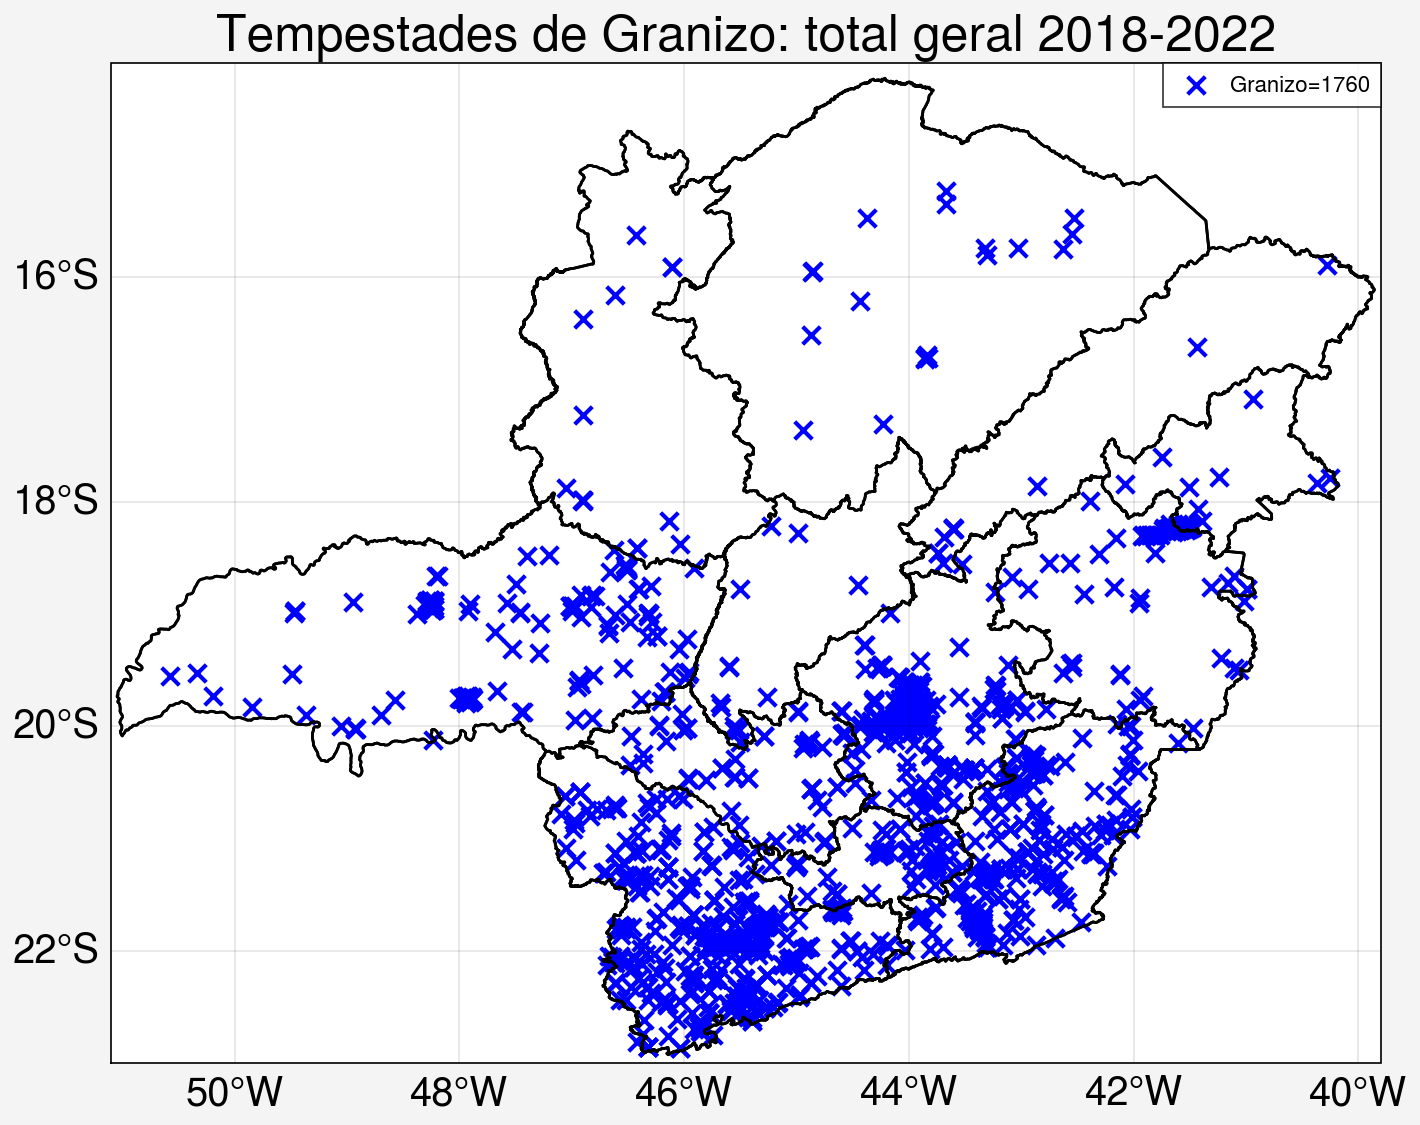

In [27]:
 # Cria a moldura da figura
fig, ax = plot.subplots(axheight=5, tight=True, proj='pcarree')

# Cria o formato dos eixos da figura
ax.format(coast=False, borders=True, innerborders=False,
          labels=True, 
          latlines=2, lonlines=2, 
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax), 
          title=f'Tempestades de Granizo: total geral 2018-2022', 
          small='20px', large='25px')

# Plota granizo
ax.scatter(df_mg['lon'].values, df_mg['lat'].values, 
           transform=ccrs.PlateCarree(), 
           marker='x', s=40, color='b', 
           label=f'Granizo={df_mg.shape[0]}')

# Plota contornos dos Estados
evm_plot_states('shapefiles/MG_UF_2019.shp')

# Plota contornos das Mesoregiões
evm_plot_states('shapefiles/MG_Mesorregioes_2020.shp')

# Adiciona legenda
ax.legend(ncol=1, prop={'size': 8})

# Salva figura
fig.save(f'output/Fig1_total_geral.png', bbox_inches='tight', dpi=300)

# Exibe figura na tela
plot.show()

### **PARTE 2):** Plota mapa por ano

In [28]:
# nomes dos anos
anos = ['2018', '2019', '2020', '2021', '2022']

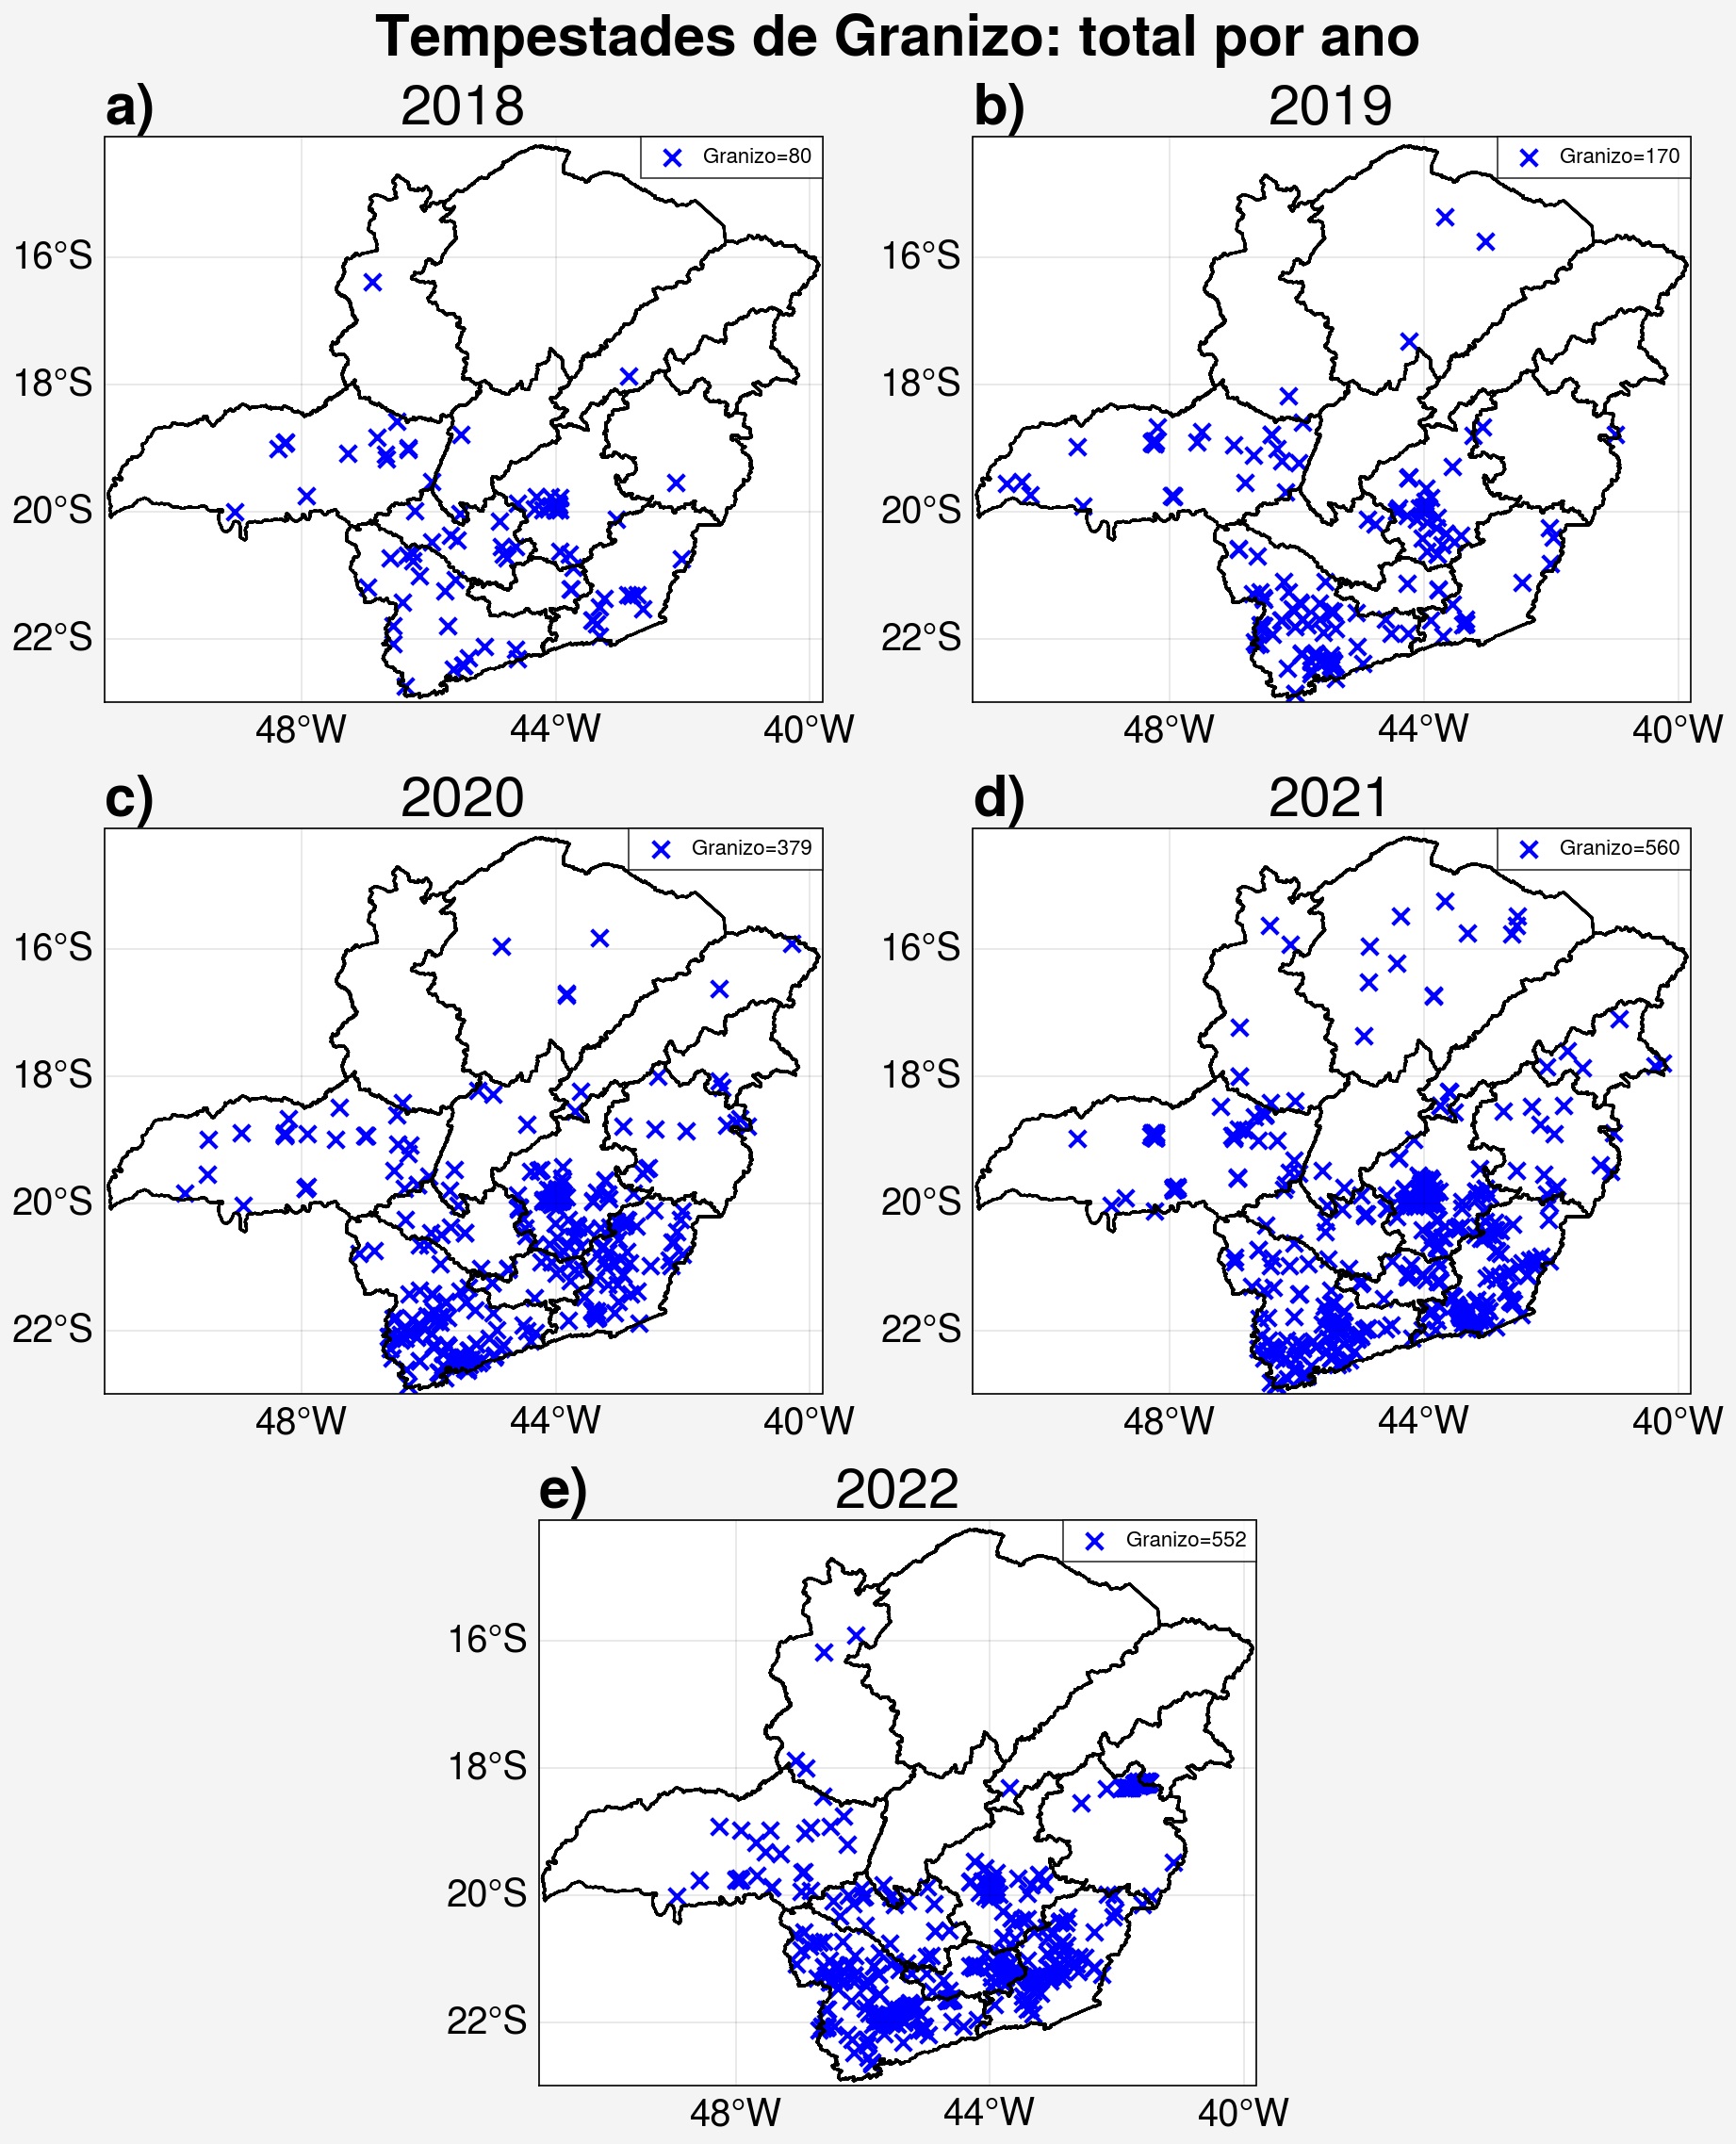

In [29]:
# cria a moldura da figura   
array = [ 
          [1,1,2,2],
          [1,1,2,2],
          [3,3,4,4],
          [3,3,4,4],
          [0,5,5,0],
          [0,5,5,0]
         ]
fig, ax = plot.subplots(array, axheight=3, tight=True, 
                        proj='pcarree', sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False, 
          labels=True, 
          latlines=2, lonlines=4,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),  
          suptitle=f'Tempestades de Granizo: total por ano',
          abc=True, abcstyle='a)', abcsize=5,
          small='20px', large='30px')

# loop dos meses
for m, nome_ano in enumerate(anos):
    
    # ano: exemplo 2022'
    date = f'{nome_ano}' # 2018
    
    # seleciona os dados de um determinado mês
    df_ano = df_mg.loc[date]

    # plota figura
    if m == 0:
        map1 = ax[m].scatter(df_ano['lon'].values, df_ano['lat'].values, 
                             transform=ccrs.PlateCarree(), 
                             marker='x', s=40, color='b', 
                             label=f'Granizo={df_ano.shape[0]}')
        
    else:
        ax[m].scatter(df_ano['lon'].values, df_ano['lat'].values, 
                      transform=ccrs.PlateCarree(), 
                      marker='x', s=40, color='b', 
                      label=f'Granizo={df_ano.shape[0]}')
        
    # Adiciona legenda
    ax[m].legend(ncol=1, prop={'size': 8})
        
    # plota titulo de cada figura
    ax[m].format(title=f'{nome_ano}', labels=True)          
        
    # plota contornos dos Estados
    evm_plot_states('shapefiles/MG_UF_2019.shp')
    
    # Plota contornos das Mesoregiões
    evm_plot_states('shapefiles/MG_Mesorregioes_2020.shp')
    
# salva figura
fig.save(f'output/Fig2_total_por_ano.png', dpi=300)

### **PARTE 3):** Plota mapa por mês

In [30]:
# nomes dos meses
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 
         'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro','Dezembro']

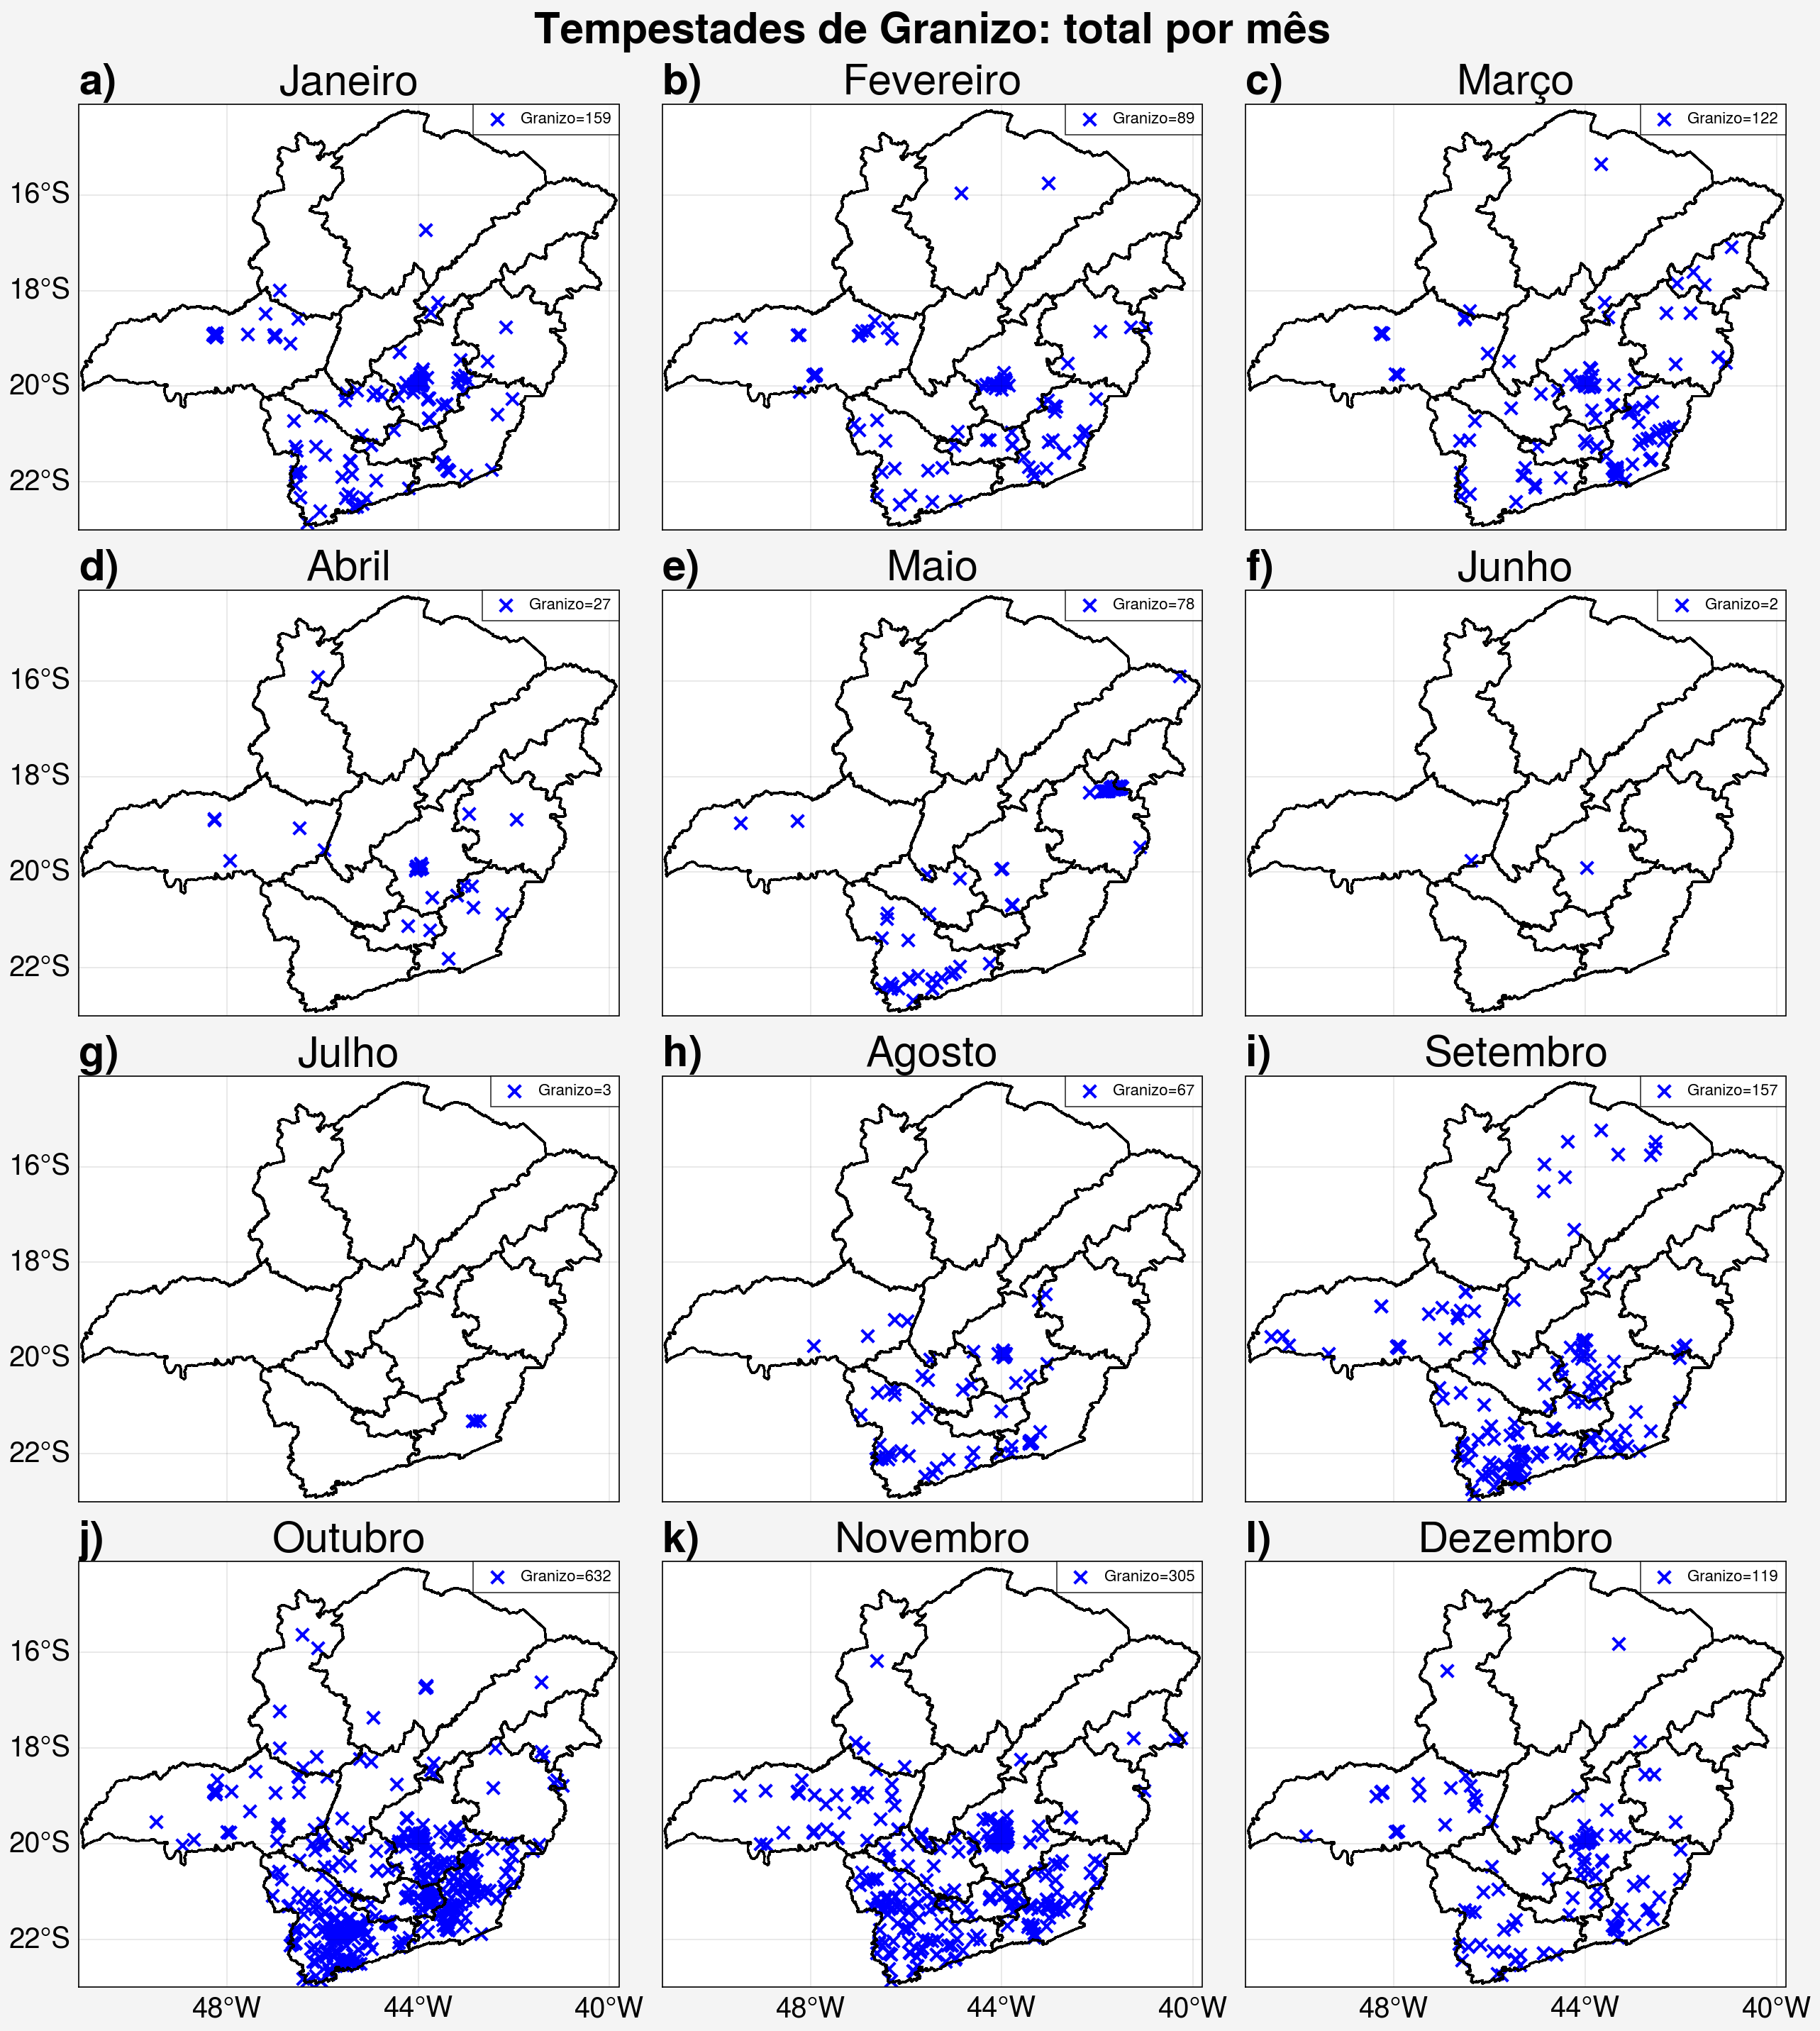

In [31]:
# cria a moldura da figura   
fig, ax = plot.subplots(ncols=3, nrows=4, axheight=3, tight=True, 
                        proj='pcarree', sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False, 
          labels=True, 
          latlines=2, lonlines=4,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),  
          suptitle=f'Tempestades de Granizo: total por mês',
          abc=True, abcstyle='a)', abcsize=5,
          small='20px', large='30px')

# loop dos meses
for m, nome_mes in enumerate(meses):
    
    # nome do mês
    mes = str(m+1).zfill(2) # Exemplo: 01
    
    # seleciona os dados de um determinado mês
    condicao = df_mg['mes'] == mes
    df_mes = df_mg[condicao]
    
    # plota figura
    if m == 0:
        map1 = ax[m].scatter(df_mes['lon'].values, df_mes['lat'].values, 
                             transform=ccrs.PlateCarree(), 
                             marker='x', s=40, color='b', 
                             label=f'Granizo={df_mes.shape[0]}')
        
    else:
        ax[m].scatter(df_mes['lon'].values, df_mes['lat'].values, 
                             transform=ccrs.PlateCarree(), 
                             marker='x', s=40, color='b', 
                             label=f'Granizo={df_mes.shape[0]}')
        
    # Adiciona legenda
    ax[m].legend(ncol=1, prop={'size': 8})
        
    # plota titulo de cada figura
    if (m==1 or m==2 or m==4 or m==5 or m==7 or m==8): ax[m].format(title=f'{nome_mes}', labels=False)          
    if (m==10 or m==11): ax[m].format(title=f'{nome_mes}', labels=[False, False, True, False])       
    if (m==0 or m==3 or m==6): ax[m].format(title=f'{nome_mes}', labels=[True, False, False, False])
    if (m==9): ax[m].format(title=f'{nome_mes}', labels=[True, False, True, False]) 
        
    # plota contornos dos Estados
    evm_plot_states('shapefiles/MG_UF_2019.shp')
    
    # Plota contornos das Mesoregiões
    evm_plot_states('shapefiles/MG_Mesorregioes_2020.shp')
    
# salva figura
fig.save(f'output/Fig3_total_por_mes.png', dpi=300)

### **PARTE 4):** Quantidade de tempestade por mesoregião de MG

In [32]:
# shapefile das mesoregiões de MG
shapefile_mesoregioes_mg = gpd.read_file('shapefiles/MG_Mesorregioes_2020.shp')
shapefile_mesoregioes_mg

,CD_MESO,NM_MESO,SIGLA_UF,geometry
0,3101,Noroeste de Minas,MG,"POLYGON ((-46.80620 -15.87062, -46.80616 -15.8..."
1,3102,Norte de Minas,MG,"POLYGON ((-45.58606 -15.71840, -45.58587 -15.7..."
2,3103,Jequitinhonha,MG,"POLYGON ((-40.31316 -16.67865, -40.31402 -16.6..."
3,3104,Vale do Mucuri,MG,"POLYGON ((-41.35140 -17.34670, -41.35114 -17.3..."
4,3105,Triângulo Mineiro/Alto Paranaíba,MG,"POLYGON ((-47.67975 -18.35609, -47.67936 -18.3..."
5,3106,Central Mineira,MG,"POLYGON ((-45.63705 -18.79194, -45.63625 -18.7..."
6,3107,Metropolitana de Belo Horizonte,MG,"POLYGON ((-44.83849 -19.73535, -44.83915 -19.7..."
7,3108,Vale do Rio Doce,MG,"POLYGON ((-43.19958 -18.86045, -43.19984 -18.8..."
8,3109,Oeste de Minas,MG,"POLYGON ((-46.62613 -19.99392, -46.62591 -19.9..."
9,3110,Sul/Sudoeste de Minas,MG,"POLYGON ((-47.14786 -21.03546, -47.14806 -21.0..."


In [33]:
# nome das mesoregiões
mesoregioes = list(shapefile_mesoregioes_mg['NM_MESO'].values)
mesoregioes

['Noroeste de Minas',
 'Norte de Minas',
 'Jequitinhonha',
 'Vale do Mucuri',
 'Triângulo Mineiro/Alto Paranaíba',
 'Central Mineira',
 'Metropolitana de Belo Horizonte',
 'Vale do Rio Doce',
 'Oeste de Minas',
 'Sul/Sudoeste de Minas',
 'Campo das Vertentes',
 'Zona da Mata']

Cria o GeoDataframe com selecionados dentro do shapefile

In [34]:
df_mg.head(2)

,verificado,q,data,hormin,incerteza_hormin,lat,lon,incerteza_loc,cidade,UF,tipo,intensidade,descricao,ano,mes,dia,hor,min
datax,,,,,,,,,,,,,,,,,,
2018-07-10 20:55:00,SIM,0.0,20180710,2055,0.0,-21.3093,-42.8626,0.0,Astolfo Dutra,MG,GRA,0.0,Horário estimado pelo radar de Pico do Couto. ...,2018,07,10,20,55
2018-07-10 21:05:00,SIM,0.0,20180710,2105,0.0,-21.3164,-42.8131,0.0,Dona Euzébia,MG,GRA,0.0,Horário estimado pelo radar de Pico do Couto. ...,2018,07,10,21,05


In [35]:
# Cria o GeoDataframe de raios
storms = zip(df_mg['lon'], df_mg['lat'])                                         # Variavel "raios' para jogarmos no loop de leitura
geometry = [Point(storms) for storms in zip(df_mg['lon'], df_mg['lat']) ]         # Configura/Ajeita a geometria dos pontos
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True} 
geo_df_storms = gpd.GeoDataFrame(df_mg, crs=crs, geometry=geometry)                 # GeoDataFrame de Raios

# Converte o Crs de MG - Aqui deixa o CRS do dado e do shape igual
MG_mesoregioes = shapefile_mesoregioes_mg.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units =km +no_defs')
geo_df_storms = geo_df_storms.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# Elimina dados fora da cidade
ind = MG_mesoregioes[ MG_mesoregioes['NM_MESO'] == 'Noroeste de Minas'].index
indice = ind[0]

geo_df_storms_selecionadas = geo_df_storms[ geo_df_storms['geometry'].within(MG_mesoregioes.iloc[indice].geometry) ]

display(geo_df_storms_selecionadas)
print(geo_df_storms_selecionadas.shape[0])

,verificado,q,data,hormin,incerteza_hormin,lat,lon,incerteza_loc,cidade,UF,tipo,intensidade,descricao,ano,mes,dia,hor,min,geometry
datax,,,,,,,,,,,,,,,,,,,
2018-12-25 19:50:00,SIM,0.0,20181225,1950,0.0,-16.3720,-46.8960,0.0,Unaí,MG,GRA,0.0,Horário estimado pelo radar de São Francisco. ...,2018,12,25,19,50,POINT (297.492 8188.971)
2019-10-27 19:10:00,SIM,1,20191027,1910,10,-18.1749,-46.1390,1,Presidente OlegÃ¡rio,MG,GRA,2.0,HorÃ¡rio estimado pelo radar de TrÃªs Marias. ...,2019,10,27,19,10,POINT (379.535 7990.091)
2020-10-26 22:30:00,SIM,1.0,20201026,2230,60.0,-18.4167,-46.4187,3.0,Presidente Olegário,MG,GRA,0.0,Horário estimado por satélite. https://ponotic...,2020,10,26,22,30,POINT (350.157 7963.125)
2021-01-03 18:00:00,SIM,1.0,20210103,1800,15.0,-17.9901,-46.9060,1.0,Vazante,MG,GRA,0.0,Horário estimado pelo radar de São Francisco. ...,2021,01,03,18,00,POINT (298.184 8009.873)
2021-03-31 15:55:00,SIM,1.0,20210331,1555,20.0,-18.4138,-46.4199,2.0,Presidente Olegário,MG,GRA,0.0,Horário estimado pelo radar de São Francisco. ...,2021,03,31,15,55,POINT (350.028 7963.445)
2021-04-04 17:40:00,SIM,1.0,20210404,1740,10.0,-15.9133,-46.1049,3.0,Arinos,MG,GRA,0.0,Horário estimado pelo radar de São Francisco e...,2021,04,04,17,40,POINT (381.728 8240.342)
2021-10-12 20:00:00,SIM,1.0,20211012,2000,30.0,-17.9902,-46.9021,3.0,Vazante,MG,GRA,0.0,Horário estimado por satélite. Relato via rede...,2021,10,12,20,00,POINT (298.597 8009.866)
2021-10-14 20:50:00,SIM,1.0,20211014,2050,15.0,-15.6283,-46.4285,3.0,Buritis,MG,GRA,0.0,Horário estimado por radar e relato via rede s...,2021,10,14,20,50,POINT (346.870 8271.665)
2021-10-21 17:20:00,SIM,1.0,20211021,1720,15.0,-17.2251,-46.9001,4.0,Paracatu,MG,GRA,0.0,Horário estimado pelo radar de Gama. Relato vi...,2021,10,21,17,20,POINT (297.959 8094.551)


14


In [36]:
geo_df_storms.head(2)

,verificado,q,data,hormin,incerteza_hormin,lat,lon,incerteza_loc,cidade,UF,tipo,intensidade,descricao,ano,mes,dia,hor,min,geometry
datax,,,,,,,,,,,,,,,,,,,
2018-07-10 20:55:00,SIM,0.0,20180710,2055,0.0,-21.3093,-42.8626,0.0,Astolfo Dutra,MG,GRA,0.0,Horário estimado pelo radar de Pico do Couto. ...,2018,07,10,20,55,POINT (721.715 7642.117)
2018-07-10 21:05:00,SIM,0.0,20180710,2105,0.0,-21.3164,-42.8131,0.0,Dona Euzébia,MG,GRA,0.0,Horário estimado pelo radar de Pico do Couto. ...,2018,07,10,21,05,POINT (726.840 7641.261)


In [37]:
# Cria o GeoDataframe de raios
storms = zip(df_mg['lon'], df_mg['lat'])                                         # Variavel "raios' para jogarmos no loop de leitura
geometry = [Point(storms) for storms in zip(df_mg['lon'], df_mg['lat']) ]         # Configura/Ajeita a geometria dos pontos
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True} 
geo_df_storms = gpd.GeoDataFrame(df_mg, crs=crs, geometry=geometry)                 # GeoDataFrame de Raios

# Converte o Crs de MG - Aqui deixa o CRS do dado e do shape igual
MG_mesoregioes = shapefile_mesoregioes_mg.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units =km +no_defs')
geo_df_storms = geo_df_storms.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# loop nas mesoregiões
storms_mesoregiao = []
for mesoregiao in mesoregioes:
    
    # elimina dados fora da cidade
    ind = MG_mesoregioes[ MG_mesoregioes['NM_MESO'] == mesoregiao].index
    indice = ind[0]

    geo_df_storms_selecionadas = geo_df_storms[ geo_df_storms['geometry'].within(MG_mesoregioes.iloc[indice].geometry) ]
    #display(geo_df_storms)
    
    # quantidade de storms para cada mesoregião
    storms_mesoregiao.append(geo_df_storms_selecionadas.shape[0])   
    
    print('PROCESSANDO....>>>', mesoregiao, '/ storms=', geo_df_storms.shape[0], '/ indice=', indice)

PROCESSANDO....>>> Noroeste de Minas / storms= 1760 / indice= 0
PROCESSANDO....>>> Norte de Minas / storms= 1760 / indice= 1
PROCESSANDO....>>> Jequitinhonha / storms= 1760 / indice= 2
PROCESSANDO....>>> Vale do Mucuri / storms= 1760 / indice= 3
PROCESSANDO....>>> Triângulo Mineiro/Alto Paranaíba / storms= 1760 / indice= 4
PROCESSANDO....>>> Central Mineira / storms= 1760 / indice= 5
PROCESSANDO....>>> Metropolitana de Belo Horizonte / storms= 1760 / indice= 6
PROCESSANDO....>>> Vale do Rio Doce / storms= 1760 / indice= 7
PROCESSANDO....>>> Oeste de Minas / storms= 1760 / indice= 8
PROCESSANDO....>>> Sul/Sudoeste de Minas / storms= 1760 / indice= 9
PROCESSANDO....>>> Campo das Vertentes / storms= 1760 / indice= 10
PROCESSANDO....>>> Zona da Mata / storms= 1760 / indice= 11


In [38]:
print(mesoregioes,'\n')
print(storms_mesoregiao)

['Noroeste de Minas', 'Norte de Minas', 'Jequitinhonha', 'Vale do Mucuri', 'Triângulo Mineiro/Alto Paranaíba', 'Central Mineira', 'Metropolitana de Belo Horizonte', 'Vale do Rio Doce', 'Oeste de Minas', 'Sul/Sudoeste de Minas', 'Campo das Vertentes', 'Zona da Mata'] 

[14, 19, 11, 24, 178, 15, 443, 56, 57, 540, 100, 300]


In [39]:
# colocando os dados em um DataFrame
df_mesoregiao = pd.DataFrame({'mesoregiao': mesoregioes, 'storms': storms_mesoregiao})
df_mesoregiao

,mesoregiao,storms
0,Noroeste de Minas,14
1,Norte de Minas,19
2,Jequitinhonha,11
3,Vale do Mucuri,24
4,Triângulo Mineiro/Alto Paranaíba,178
5,Central Mineira,15
6,Metropolitana de Belo Horizonte,443
7,Vale do Rio Doce,56
8,Oeste de Minas,57
9,Sul/Sudoeste de Minas,540


In [40]:
df_mesoregiao.sort_values(by='storms', ascending=False)

,mesoregiao,storms
9,Sul/Sudoeste de Minas,540
6,Metropolitana de Belo Horizonte,443
11,Zona da Mata,300
4,Triângulo Mineiro/Alto Paranaíba,178
10,Campo das Vertentes,100
8,Oeste de Minas,57
7,Vale do Rio Doce,56
3,Vale do Mucuri,24
1,Norte de Minas,19
5,Central Mineira,15


In [41]:
df_mesoregiao2 = df_mesoregiao.sort_values(by='storms', ascending=True)

In [42]:
df_mesoregiao2['storms']

2      11
0      14
5      15
1      19
3      24
7      56
8      57
10    100
4     178
11    300
6     443
9     540
Name: storms, dtype: int64

In [43]:
df_mesoregiao2['storms'].sum()

1757

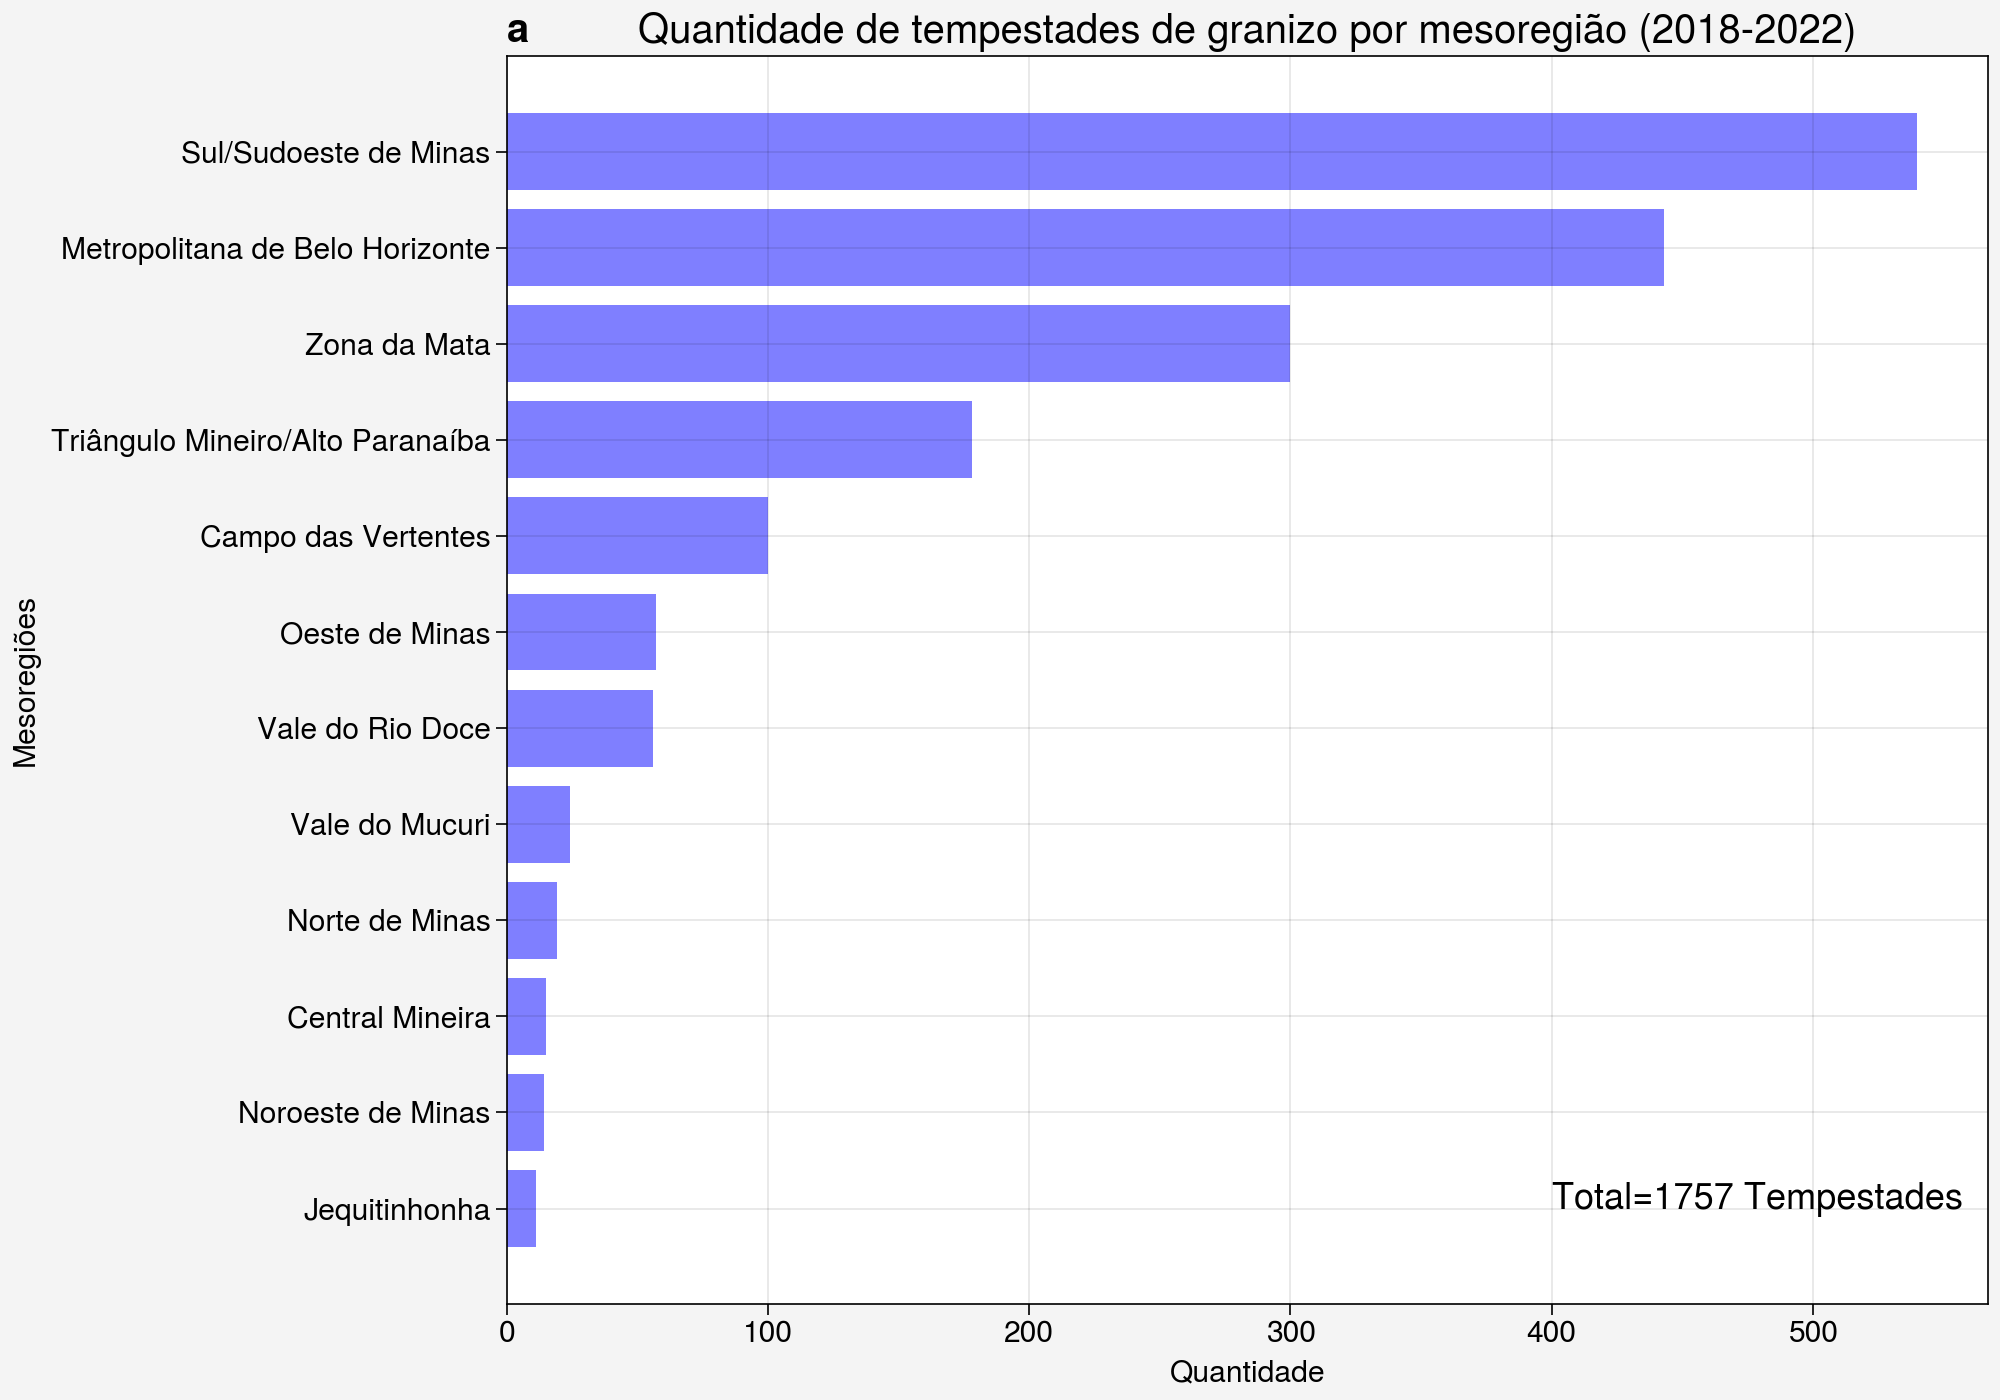

In [44]:
# cria moldura da figura
fig, ax = plot.subplots(figsize=(10, 7), tight=True)

# plota gráfico de barras
ax.barh(df_mesoregiao2['mesoregiao'], df_mesoregiao2['storms'], color='blue', alpha=0.5)

# formatação do eixo
ax.format(title=f'Quantidade de tempestades de granizo por mesoregião (2018-2022)', 
          xlabel='Quantidade', ylabel='Mesoregiões', 
          small='15px', large='20px',
          xtickminor=False, ytickminor=False,
          xrotation=0,
          abc=False)

# legenda
tot = df_mesoregiao2["storms"].sum()
ax.annotate(f'Total={tot} Tempestades',
            xy=(400, 0), 
            fontsize=13, 
            color='black')

# salva figura
fig.save(f'output/Fig4_total_por_mesoregiao.png', dpi=300)

# exibe figura na tela
plot.show()